In [1]:
# Required Libraries
import numpy as np
import pandas as pd

In [2]:
# Load subset
df = pd.read_csv('/project/processed_data/synthetic_data.csv')
df.head(3)

,Storefront,Visible Sign of Business,Business WiFi,Business tables,Business Plugs,Business Internal CCTV,External CCTV,Number of female employees,Accepts credit card,Incline,...,Collision,Run over,Metro,Metrobus,Trolleybus,RTP,Concessioned,e-bike,Total coverage of transport,category
0,0.561028,0.561028,0.567452,0.56531,0.561028,0.573876,0.561028,0.922912,0.955032,0.520343,...,0.002141,0.344754,0.004283,0.072805,0.56531,0.762313,0.004283,0.310493,0.948608,Desirable
1,0.561028,0.561028,0.567452,0.56531,0.561028,0.573876,0.561028,0.599572,0.950749,0.950749,...,0.002141,0.344754,0.004283,0.066381,0.56531,0.762313,0.004283,0.310493,0.899358,Desirable
2,0.561028,0.561028,0.567452,0.56531,0.561028,0.573876,0.561028,0.970021,1.000000,0.989293,...,0.002141,0.062099,0.004283,0.010707,0.56531,0.762313,0.004283,0.310493,0.100642,Acceptable


In [3]:
import sys
sys.path.append('/project/ELECTRE_Tree')

from electre_tree import tree_e_tri_b , util_e_tri_b


In [4]:
y_train = df['category']
y_train

0       Desirable
1       Desirable
2      Acceptable
3      Inadequate
4       Desirable
          ...    
495    Inadequate
496     Desirable
497     Desirable
498     Desirable
499    Inadequate
Name: category, Length: 500, dtype: object

In [4]:
df_x= df.drop('category', axis=1)

In [5]:
# Convert to array format
arr = df_x.values
arr

array([[0.56102784, 0.56102784, 0.56745182, ..., 0.00428266, 0.31049251,
        0.94860814],
       [0.56102784, 0.56102784, 0.56745182, ..., 0.00428266, 0.31049251,
        0.8993576 ],
       [0.56102784, 0.56102784, 0.56745182, ..., 0.00428266, 0.31049251,
        0.1006424 ],
       ...,
       [0.56102784, 0.56102784, 0.56745182, ..., 0.00428266, 0.09207709,
        0.94860814],
       [0.56102784, 0.56102784, 0.60813704, ..., 0.00428266, 0.27837259,
        0.94860814],
       [0.56102784, 0.56102784, 0.56745182, ..., 0.00428266, 0.09207709,
        0.00428266]])

In [7]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 100


# Parameters - GA
elite       = 1
eta         = 1
mu          = 2
size        = 15
rate        = 0.05
generations = 30
samples     = 0.25

In [9]:
# Train Model
models = tree_e_tri_b.tree_electre_tri_b(arr, 
                                         #target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         population_size = size, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10
Model # 11
Model # 12
Model # 13
Model # 14
Model # 15
Model # 16
Model # 17
Model # 18
Model # 19
Model # 20
Model # 21
Model # 22
Model # 23
Model # 24
Model # 25
Model # 26
Model # 27
Model # 28
Model # 29
Model # 30
Model # 31
Model # 32
Model # 33
Model # 34
Model # 35
Model # 36
Model # 37
Model # 38
Model # 39
Model # 40
Model # 41
Model # 42
Model # 43
Model # 44
Model # 45
Model # 46
Model # 47
Model # 48
Model # 49
Model # 50
Model # 51
Model # 52
Model # 53
Model # 54
Model # 55
Model # 56
Model # 57
Model # 58
Model # 59
Model # 60
Model # 61
Model # 62
Model # 63
Model # 64
Model # 65
Model # 66
Model # 67
Model # 68
Model # 69
Model # 70
Model # 71
Model # 72
Model # 73
Model # 74
Model # 75
Model # 76
Model # 77
Model # 78
Model # 79
Model # 80
Model # 81
Model # 82
Model # 83
Model # 84
Model # 85
Model # 86
Model # 87
Model # 88
Model # 89
Model # 90
Model # 91
Model # 

In [10]:
prediction, solutions = tree_e_tri_b.predict(models, arr, verbose = False, rule = 'pc')

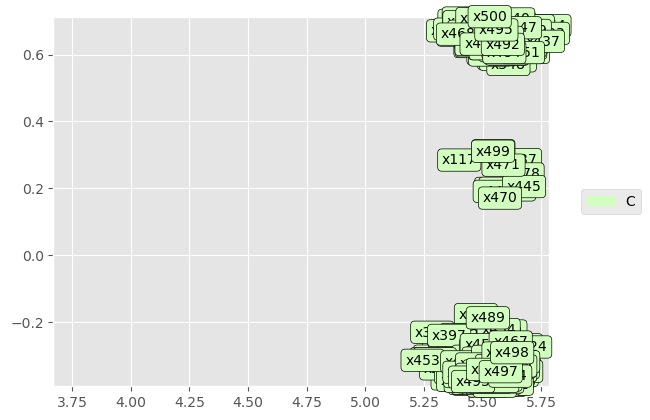

In [11]:
util_e_tri_b.plot_points(arr, prediction)

In [25]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes)

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
    print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
    print('Lambda Cutoff: ', round(cut_mean,  2))
    print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.53 0.6  0.49 0.5  0.45 0.45 0.44 0.57 0.53 0.54 0.67 0.44 0.29 0.39
 0.37 0.65 0.51 0.65 0.36 0.36 0.51 0.53 0.43 0.59 0.57 0.4  0.24 0.57
 0.55 0.34 0.62 0.42 0.6  0.39 0.35 0.52 0.43 0.56 0.58 0.67 0.41 0.24
 0.5  0.43 0.46 0.61 0.55 0.2  0.66 0.53 0.56 0.48 0.52 0.54 0.59 0.39
 0.48 0.45 0.42 0.39 0.39 0.45 0.72 0.64 0.42 0.58 0.41 0.48 0.43 0.53
 0.56 0.38 0.6 ]
Q:  [0.   0.   0.01 0.   0.   0.   0.   0.09 0.02 0.1  0.01 0.   0.   0.
 0.03 0.   0.04 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.03 0.05 0.   0.02 0.04 0.   0.   0.03 0.02 0.01 0.11 0.21
 0.37 0.32 0.09 0.24 0.   0.13 0.   0.08 0.   0.07 0.   0.01 0.   0.
 0.   0.06 0.22]
P:  [0.   0.   0.02 0.   0.   0.   0.   0.12 0.02 0.13 0.01 0.   0.   0.
 0.03 0.   0.05 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.03 0.06 0.   0.02